In [22]:
#Imports up here
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from cleaning import read_and_clean
# Dealing with some weird issues importing cleaning so I just copied those methdos into here for now

In [31]:
def read_to_one_frame(path) -> pd.DataFrame:
    """Reads all csv files in a directory and concatenates them into a single DataFrame"""
    df = pd.DataFrame()
    for file in os.listdir(path):
        if not file.endswith('20.csv'):
            year = '20' + str(file[-6:-4])
            file = os.path.join(path, file)
            if file.endswith('.csv'):
                currYear = pd.read_csv(file)
                currYear['YEAR'] = year
                df = pd.concat([df, currYear])

    df.drop('EFGD_D', axis = 1, inplace = True)

    return df


def encode_postseason(df: pd.DataFrame) -> pd.DataFrame:
    """Encodes postseason games as 1 and regular season games as 0"""
    rankings = {
        'Champions': 1,
        '2ND': 2,
        'F4': 3, 
        'E8': 4,
        'S16': 5,
        'R32': 6,
        'R64': 7,
        'R68': 8,
    }

    df['POSTSEASON'] = df['POSTSEASON'].map(rankings)
    return df


def arrange_cols(df: pd.DataFrame) -> pd.DataFrame:
    """Rearranges columns"""
    col_order = list(df.columns[:-3]) + ['SEED', 'YEAR', 'POSTSEASON']
    return df[col_order]

def create_made_postseason(df):
    """Creates a new column that indicates whether a team made the postseason"""
    #replace N/A with NA
    df['MADE_POSTSEASON'] = np.where(pd.isna(df['POSTSEASON']), 0, 1)
    return df

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """Cleans data"""
    df = encode_postseason(df)
    df = arrange_cols(df)
    df = create_made_postseason(df)
    return df


def read_and_clean(path: str) -> pd.DataFrame:
    """Reads and cleans data"""
    df = read_to_one_frame(path)
    return clean_data(df)

In [38]:
#Putting data into df dataframe
df = read_and_clean('../data')
# df.head()
df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_6772\2861604861.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MADE_POSTSEASON'] = np.where(pd.isna(df['POSTSEASON']), 0, 1)


(3523, 25)

In [45]:
#Correlation of teams stats strictly looking at whether or not a team made March Madness
these_columns = ['W','ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB','SEED','MADE_POSTSEASON']
df_postseason_correlation = df[these_columns].copy()
correlation = df_postseason_correlation.corr()
postseason_correlation = correlation['MADE_POSTSEASON']
postseason_correlation

W                  0.600956
ADJOE              0.543512
ADJDE             -0.495591
BARTHAG            0.576490
EFG_O              0.350247
EFG_D             -0.388447
2P_O               0.320068
2P_D              -0.351269
3P_O               0.260112
3P_D              -0.289355
ADJ_T             -0.032184
WAB                0.643949
SEED                    NaN
MADE_POSTSEASON    1.000000
Name: MADE_POSTSEASON, dtype: float64

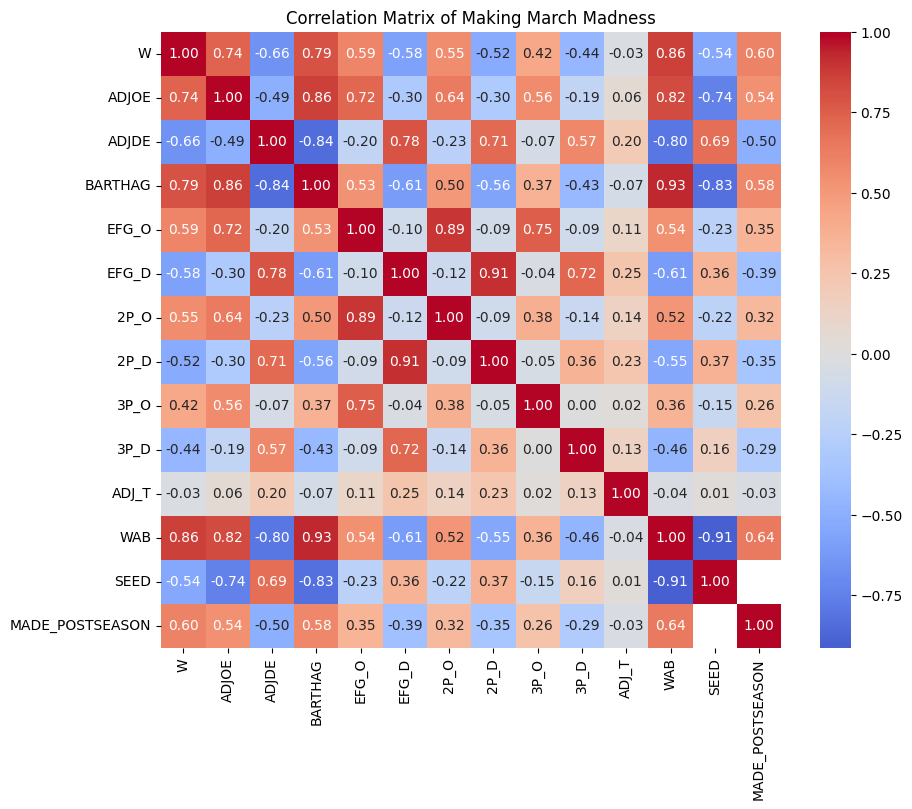

In [47]:
#Heatmap of entire Correlation Matrix, looking at whether or not a team made March Madness
correlation_matrix = df_postseason_correlation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Correlation Matrix of Making March Madness')
plt.show()

In [48]:
#Correlation matrix stricly examing teams that made March Madness and where they finished in March Madness
df_made_postseason = df[df['MADE_POSTSEASON'] == 1]
selected_columns = ['W','ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','2P_O','2P_D','3P_O','3P_D','ADJ_T','WAB','SEED','POSTSEASON']
df_correlation_copy = df_made_postseason[selected_columns].copy() #Excluding Team, CONF, G, MADE_POSTSEASON

correlation_POSTSEASON = df_correlation_copy.corr(method='pearson')['POSTSEASON'].sort_values()
correlation_POSTSEASON

W            -0.559413
WAB          -0.556219
ADJOE        -0.521685
BARTHAG      -0.494966
EFG_O        -0.239155
2P_O         -0.225257
3P_O         -0.147424
ADJ_T         0.049961
3P_D          0.139781
2P_D          0.221796
EFG_D         0.251926
ADJDE         0.444616
SEED          0.570671
POSTSEASON    1.000000
Name: POSTSEASON, dtype: float64

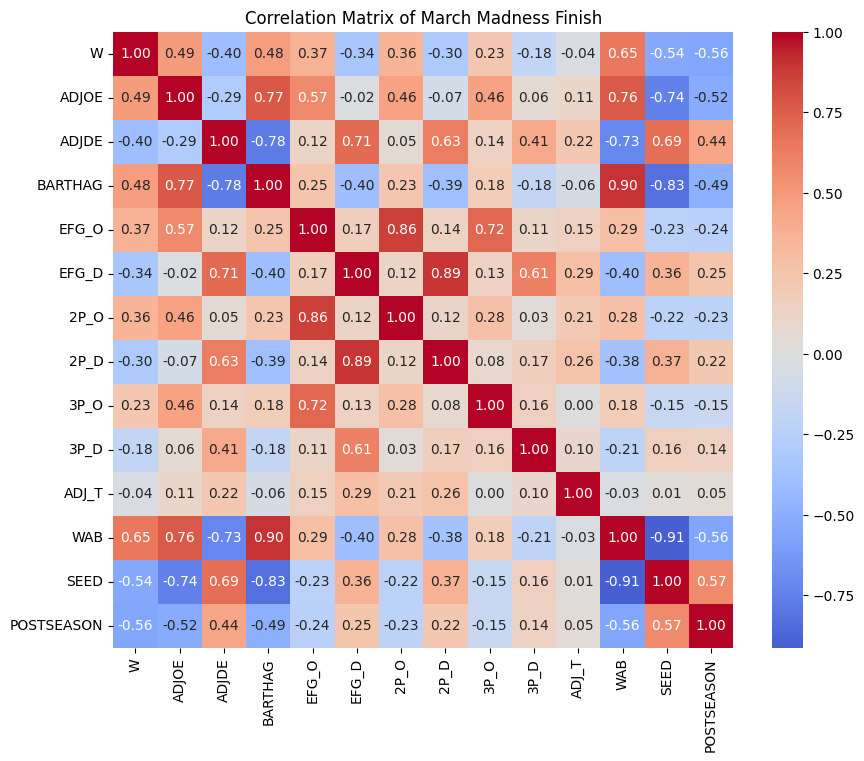

In [49]:
#Heatmap of entire Correlation Matrix
correlation_matrix = df_correlation_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Correlation Matrix of March Madness Finish')
plt.show()